In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
df = pd.read_csv('indian-cities-dataset.csv')
df.head()

,Origin,Destination,Distance
0,Agra,Delhi,240
1,Agra,Lucknow,334
2,Agra,Kanpur,277
3,Ahmedabad,Mumbai,526
4,Ahmedabad,Pune,663


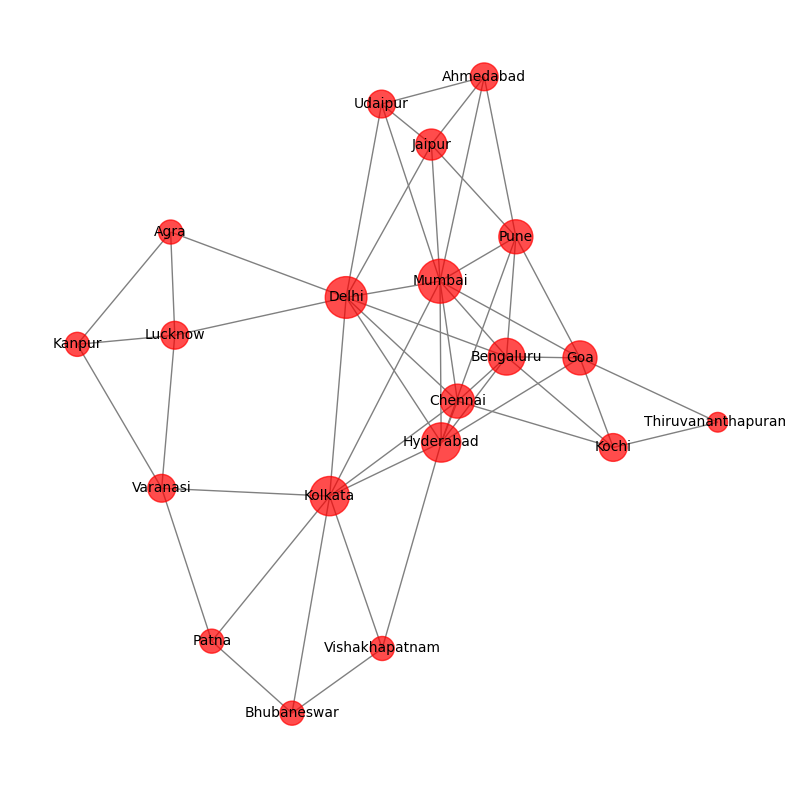

[('Mumbai', 10),
 ('Delhi', 9),
 ('Hyderabad', 8),
 ('Kolkata', 8),
 ('Bengaluru', 7),
 ('Pune', 6),
 ('Chennai', 6),
 ('Goa', 6),
 ('Jaipur', 5),
 ('Lucknow', 4)]

In [3]:
# @title Analisa Kota Pusat berdasarkan Jumlah Konektivitas
G = nx.from_pandas_edgelist(df, 'Origin', 'Destination', ['Distance'])
plt.figure(figsize=(10,10))
pos1= nx.spring_layout(G, k=0.15, seed=42)
degree_dict = dict(G.degree(G.nodes()))
node_size1 = [v * 100 for v in degree_dict.values()]
nx.draw_networkx_nodes(G, pos1, node_size=node_size1, node_color='red',alpha=0.7)
nx.draw_networkx_edges(G, pos1, edge_color='gray' )
nx.draw_networkx_labels(G, pos1, font_size=10, font_family='sans-serif')
plt.axis('off')
plt.show()

Sort_degree_dict = sorted(dict(G.degree(G.nodes())).items(), key=lambda x: x[1], reverse=True)
Sort_degree_dict [: 10]

Berdasarkan grafik diatas menunjukan terdapat 2 kota yang memiliki konektivitas tinggi antar kota yaitu Mumbai dan Delhi. Karena kota Mumbai memiliki konetivitas antar kota yang sangat tinggi maka dapat dianggap sebagai sental pusat. Dengan gambaran ini maka dapat disimpulakan bahwa Mumbai memiliki peran penting dalam berkontribusi pada pembangunan yang lebih berkelanjutan untuk antar kota lainnya.

Masukkan nama kota asal: Mumbai


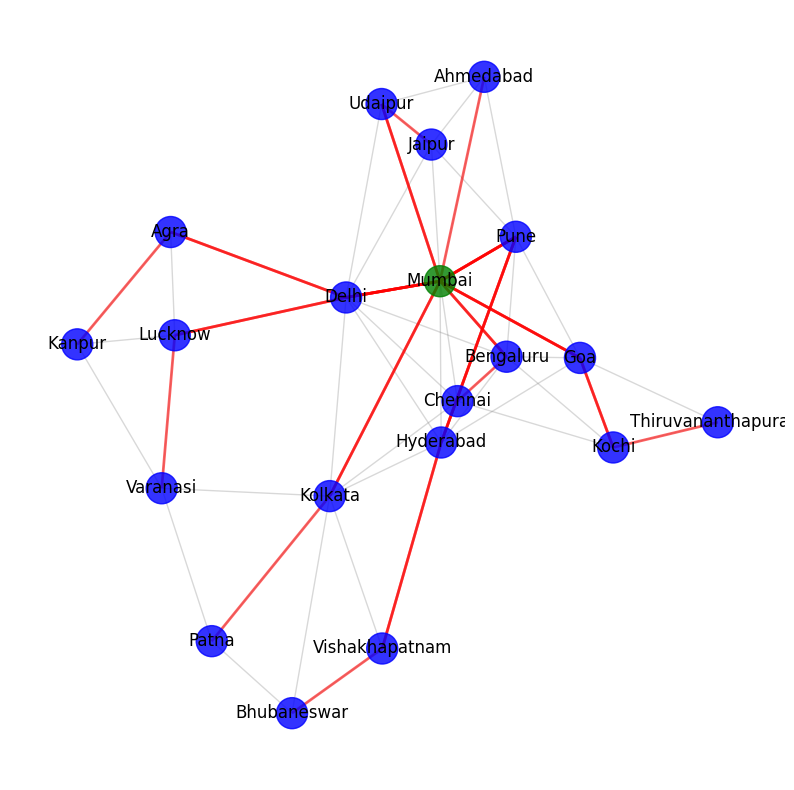

In [4]:
# @title Analisa Rute Terpendek dari Kota Pusat (Mumbai) Dengan Algoritma Floyd Warshall
pred, dist = nx.floyd_warshall_predecessor_and_distance(G, weight='Distance')

# Input dari pengguna
source_input = input('Masukkan nama kota asal: ').strip()
subset_shortest_paths = {}
for target in G.nodes:
    if target != source_input:
        path = []
        current_node = target
        while current_node != source_input:
            path.append(current_node)
            current_node = pred[source_input][current_node]
        path.append(source_input)
        path.reverse()
        subset_shortest_paths[target] = path

# Visualisasi
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, k=0.15, seed=42)
node_colors = ['green' if node == source_input else 'blue' for node in G.nodes]
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=500, alpha=0.8)
nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.3)
nx.draw_networkx_labels(G, pos, font_size=12)
for destination, path in subset_shortest_paths.items():
    path_edges = list(zip(path, path[1:]))
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2, alpha=0.6)
plt.axis('off')
plt.show()


In [5]:
# @title Analisa Jarak Terdekat dari Kota Pusat (Mumbai) ke kota tertentu menggunakan algoritma Dijkstar
for _, row in df.iterrows():
  G.add_edge(row['Origin'], row['Destination'], weight=row['Distance'])

def cari_jalur_semua(graph, awal):
    jalur, rute = nx.single_source_dijkstra(graph, awal)
    jalur.pop(awal)
    sorted_jarak = sorted(jalur.items(), key=lambda x:x[1])
    print(f'5 Jarak terpendek beserta rute: ')
    for tujuan, dist in sorted_jarak:
      print(f'Dari {awal} ke {tujuan}: ')
      print(f'Jarak dari {awal} ke {tujuan} adalah: {jalur[tujuan]} km')
      print(f'Jalur: {rute[tujuan]}')

awal = 'Mumbai'
cari_jalur_semua(G, awal)

5 Jarak terpendek beserta rute: 
Dari Mumbai ke Pune: 
Jarak dari Mumbai ke Pune adalah: 150 km
Jalur: ['Mumbai', 'Pune']
Dari Mumbai ke Ahmedabad: 
Jarak dari Mumbai ke Ahmedabad adalah: 526 km
Jalur: ['Mumbai', 'Ahmedabad']
Dari Mumbai ke Goa: 
Jarak dari Mumbai ke Goa adalah: 585 km
Jalur: ['Mumbai', 'Goa']
Dari Mumbai ke Hyderabad: 
Jarak dari Mumbai ke Hyderabad adalah: 710 km
Jalur: ['Mumbai', 'Pune', 'Hyderabad']
Dari Mumbai ke Udaipur: 
Jarak dari Mumbai ke Udaipur adalah: 767 km
Jalur: ['Mumbai', 'Udaipur']
Dari Mumbai ke Bengaluru: 
Jarak dari Mumbai ke Bengaluru adalah: 984 km
Jalur: ['Mumbai', 'Bengaluru']
Dari Mumbai ke Jaipur: 
Jarak dari Mumbai ke Jaipur adalah: 1164 km
Jalur: ['Mumbai', 'Udaipur', 'Jaipur']
Dari Mumbai ke Vishakhapatnam: 
Jarak dari Mumbai ke Vishakhapatnam adalah: 1328 km
Jalur: ['Mumbai', 'Pune', 'Hyderabad', 'Vishakhapatnam']
Dari Mumbai ke Chennai: 
Jarak dari Mumbai ke Chennai adalah: 1329 km
Jalur: ['Mumbai', 'Bengaluru', 'Chennai']
Dari Mumbai ke

Dari analisa sebelumnya kota Mumbai dan Delhi merupakan 2 kota yang memiliki konektifitas yang sangat tinggi. Namun ketika melakukan analisa jarak antar ke kedua kota tersebut ternyata **Delhi merupakan kota ke 11 terdekat dari kota Mumbai.**  

*Hal tersebut menggambarkan bahwa jarak antar kota tidak menjadi jaminan bahwa kota tersebut bisa memiliki konetivitas yang sama tingginya*


Alasan kota Mumbai dan Delhi memiliki konektivitas yang tinggi dikarena, kedua kota tersebut merupakan kota yang memiliki pengaruh yang sangat besar. Dimana
- Mumbai merupakan **Pusat Keuangan dan Komersial utama**
- Delhi adalah **Pusat pemerintahan dan memiliki ekonomi yang kuat.**


Dengan begitu dapat disimpulkan bahwa konektivitas tinggi antara kedua kota didorong oleh faktor ekonomi, infastruktur, dan signifikan politik serta sosial.

<ipython-input-6-eade9eb41235>:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Pastel2_r', max(partition.values()) + 1)


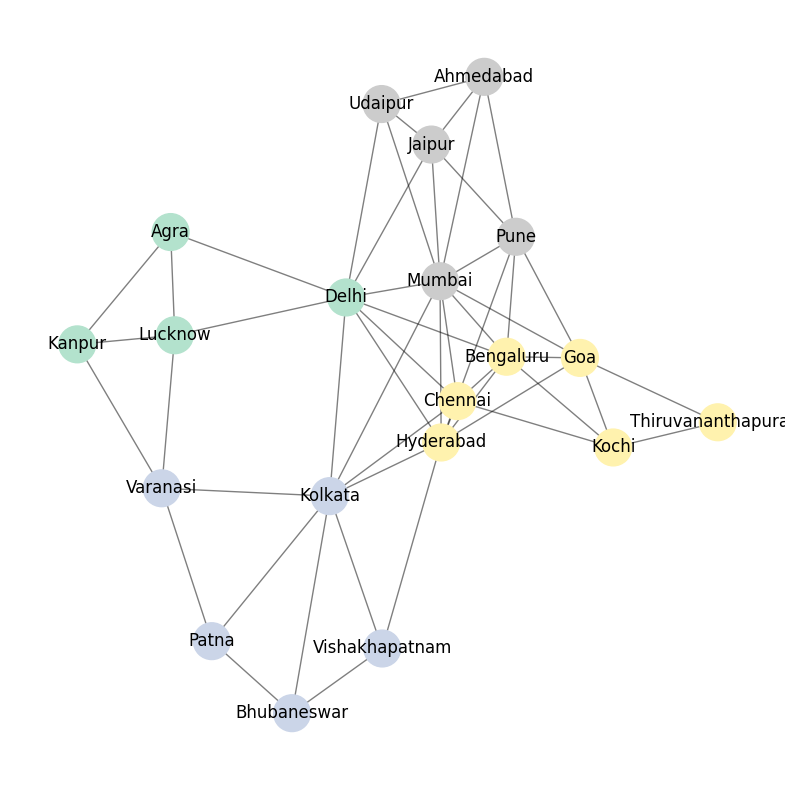

({1: 6, 0: 5, 2: 5, 3: 4},
 {1: ['Bengaluru',
   'Hyderabad',
   'Chennai',
   'Goa',
   'Kochi',
   'Thiruvananthapuram'],
  0: ['Ahmedabad', 'Mumbai', 'Pune', 'Jaipur', 'Udaipur'],
  2: ['Bhubaneswar', 'Kolkata', 'Vishakhapatnam', 'Patna', 'Varanasi'],
  3: ['Agra', 'Delhi', 'Lucknow', 'Kanpur']})

In [6]:
# @title Mengidentifikasi Kelompok Kota yang saling Berhubungan Erat
import community.community_louvain  as community_louvain

# Perform community detection using the Louvain method
G = nx.from_pandas_edgelist(df, 'Origin', 'Destination', ['Distance'])
G_undirected = G.to_undirected()
partition = community_louvain.best_partition(G_undirected)

plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, k=0.15, seed=42)
cmap = plt.cm.get_cmap('Pastel2_r', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=700,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=12)

plt.axis('off')
plt.show()

communities = {}
for node, comm_id in partition.items():
    communities.setdefault(comm_id, []).append(node)

sorted_communities = {k: v for k, v in sorted(communities.items(), key=lambda item: len(item[1]), reverse=True)}

top_communities = {k: len(v) for k, v in list(sorted_communities.items())[:5]}
top_communities, sorted_communities

Secara keseluruhan kelompok-kelompok diatas dikelompokan berdasarkan wilayah geografis utama diindia.

In [7]:
# @title Analisa Kepadatan Jaringan
network_density = nx.density(G)
network_density

0.26842105263157895

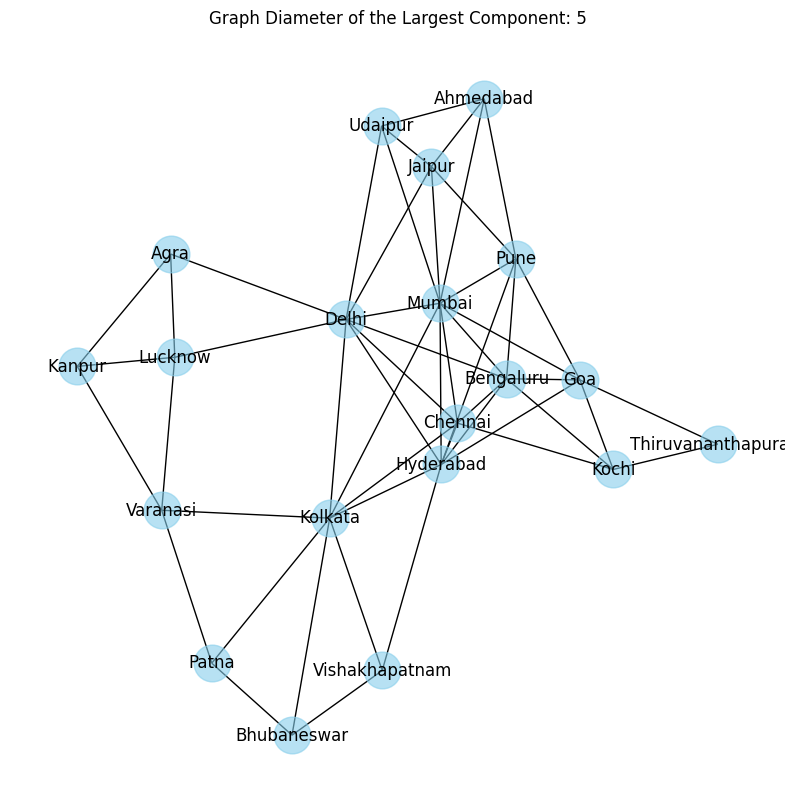

{0: 5}

In [8]:
# @title Analisa Diameter Grafik
connected_components = list(nx.connected_components(G))
component_diameters = {}

for i, component_nodes in enumerate(connected_components):
    subgraph = G.subgraph(component_nodes)
    component_diameters[i] = nx.diameter(subgraph)

largest_component = max(connected_components, key=len)
subgraph = G.subgraph(largest_component)

plt.figure(figsize=(10, 10))
pos = nx.spring_layout(subgraph, k=0.15, seed=42)
nx.draw_networkx_nodes(subgraph, pos, node_size=700, node_color="skyblue", alpha=0.6)
nx.draw_networkx_edges(subgraph, pos, width=1)
nx.draw_networkx_labels(subgraph, pos, font_size=12)

plt.title(f"Graph Diameter of the Largest Component: {component_diameters[max(component_diameters, key=component_diameters.get)]}")
plt.axis('off')
plt.show()

# Return the diameters of each connected component
component_diameters

Dalam konteks ini, diameter graf 5 berarti:
- Lintasan terpendek terpanjang antara dua simpul di dalam komponen terhubung terbesar dari graf tersebut memiliki panjang 5.
- Hal ini mengimplikasikan bahwa dibutuhkan maksimal 5 langkah (atau sisi) untuk melakukan perjalanan dari satu simpul ke simpul terjauh di dalam komponen yang sama di dalam jaringan.
- Dalam hal jaringan kota, jarak terjauh dari satu kota ke kota lainnya, dalam hal rute langsung, adalah 5 kota.
Pengukuran ini sangat berguna ketika berhadapan dengan jaringan yang mungkin tidak sepenuhnya terhubung. Jika ada beberapa subjaringan atau komponen yang terputus, diameter dapat dihitung untuk setiap subjaringan secara terpisah. Notasi kamus {0: 5} kemudian akan menunjukkan bahwa komponen terbesar yang terhubung (atau mungkin satu-satunya yang dianalisis) memiliki diameter 5.
Diameter yang kecil, seperti 5, dalam jaringan transportasi atau komunikasi menandakan bahwa jaringan tersebut relatif kompak dan efisien karena jarak terbesar antara dua kota yang saling terhubung relatif pendek.
